## 1. Data Transformation Techniques

In [1]:
import pandas as pd
from IPython.display import display

C:\Users\riyab\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\riyab\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# Sample DataFrame for transformations
df = pd.DataFrame({
    "Customer_ID": [1, 2, 3, 4],
    "Region": ["West", "East", "West", "North"],
    "Product": ["Smartphone", "Headphones", "Laptop", "Smartphone"],
    "Month": ["Jan", "Jan", "Feb", "Feb"],
    "Sales": [1200, 850, 400, 950]  # (£)
})

display(df)

,Customer_ID,Region,Product,Month,Sales
0,1,West,Smartphone,Jan,1200
1,2,East,Headphones,Jan,850
2,3,West,Laptop,Feb,400
3,4,North,Smartphone,Feb,950


### Filtering Rows (Boolean Masks & Multiple Conditions)

In [13]:
# Filter where sales > 900
df[df["Sales"] > 900]

,Customer_ID,Region,Product,Month,Sales
0,1,West,Smartphone,Jan,1200
3,4,North,Smartphone,Feb,950


In [14]:
# Filter where region is West and sales > 900
df[(df["Region"] == "West") & (df["Sales"] > 900)]

,Customer_ID,Region,Product,Month,Sales
0,1,West,Smartphone,Jan,1200


### Reshaping: pivot, melt, stack, unstack

In [18]:
# Pivot_Table: for aggregation
df.pivot_table(index="Product", columns="Month", values="Sales", aggfunc="sum")

Month,Feb,Jan
Product,,
Headphones,NaN,850.0
Laptop,400.0,NaN
Smartphone,950.0,1200.0


In [16]:
# Pivot: Show sales by product across months
df_pivot = df.pivot(index="Product", columns="Month", values="Sales")
display(df_pivot)

Month,Feb,Jan
Product,,
Headphones,NaN,850.0
Laptop,400.0,NaN
Smartphone,950.0,1200.0


In [22]:
# Melt: Unpivot the pivoted table back
df_melted = pd.melt(df_pivot.reset_index(), id_vars="Product", value_name="Sales")
df_melted

,Product,Month,Sales
0,Headphones,Feb,NaN
1,Laptop,Feb,400.0
2,Smartphone,Feb,950.0
3,Headphones,Jan,850.0
4,Laptop,Jan,NaN
5,Smartphone,Jan,1200.0


In [26]:
# Stack
stacked = df.set_index(["Region", "Product"]).stack()
stacked

Region  Product                
West    Smartphone  Customer_ID       1
                    Month           Jan
                    Sales          1200
East    Headphones  Customer_ID       2
                    Month           Jan
                    Sales           850
West    Laptop      Customer_ID       3
                    Month           Feb
                    Sales           400
North   Smartphone  Customer_ID       4
                    Month           Feb
                    Sales           950
dtype: object

In [27]:
# Unstack
unstacked = df.set_index(["Region", "Product"]).unstack()
unstacked

Customer_ID                        Month                        Sales  \
Product  Headphones Laptop Smartphone Headphones Laptop Smartphone Headphones   
Region                                                                          
East            2.0    NaN        NaN        Jan    NaN        NaN      850.0   
North           NaN    NaN        4.0        NaN    NaN        Feb        NaN   
West            NaN    3.0        1.0        NaN    Feb        Jan        NaN   

                           
Product Laptop Smartphone  
Region                     
East       NaN        NaN  
North      NaN      950.0  
West     400.0     1200.0

### Combining Data: merge, concat

In [48]:
# Simulate customers DataFrame to merge with
customers = pd.DataFrame({
    "Customer_ID": [1, 2, 3, 4, 5],
    "Customer_Name": ["Alice", "Bob", "Cathy", "Dan", "Charlie"]
})

customers

,Customer_ID,Customer_Name
0,1,Alice
1,2,Bob
2,3,Cathy
3,4,Dan
4,5,Charlie


In [51]:
# Merge with customer names
df_merged = pd.merge(df, customers, on="Customer_ID", how="left")
df_merged

,Customer_ID,Region,Product,Month,Sales,Customer_Name
0,1,West,Smartphone,Jan,1200,Alice
1,2,East,Headphones,Jan,850,Bob
2,3,West,Laptop,Feb,400,Cathy
3,4,North,Smartphone,Feb,950,Dan


In [52]:
# Creating quarters [using Boolean Mask]
df_q1 = df[df["Month"] == "Jan"]
df_q2 = df[df["Month"] == "Feb"]

Jan Quarter:



,Customer_ID,Region,Product,Month,Sales
0,1,West,Smartphone,Jan,1200
1,2,East,Headphones,Jan,850


In [53]:
df_q2 = df[df["Month"] == "Feb"]
print("Feb Quarter:\n")
df_q2

Feb Quarter:



,Customer_ID,Region,Product,Month,Sales
2,3,West,Laptop,Feb,400
3,4,North,Smartphone,Feb,950


In [54]:
# Concantenate quarters
df_combined = pd.concat([df_q1, df_q2])
df_combined

,Customer_ID,Region,Product,Month,Sales
0,1,West,Smartphone,Jan,1200
1,2,East,Headphones,Jan,850
2,3,West,Laptop,Feb,400
3,4,North,Smartphone,Feb,950


### Enrichment: Lookup / Map

In [4]:
# Simulate region lookup dictionary
region_lookup = {
    "West": "Western Region",
    "East": "Eastern Region",
    "North": "Northern Region"
}

# Enrich region description
df["region name"] = df["Region"].map(region_lookup)
# Rename columns
df.rename(columns={"Sales": "Sales (£)"}, inplace=True)
# lowercase all
df.columns = [col.lower() for col in df.columns]
# remove spaces
df.columns = [col.replace(" ", "_") for col in df.columns]
df

,customer_id,region,product,month,sales_(£),region_name
0,1,West,Smartphone,Jan,1200,Western Region
1,2,East,Headphones,Jan,850,Eastern Region
2,3,West,Laptop,Feb,400,Western Region
3,4,North,Smartphone,Feb,950,Northern Region


### Normalization: MinMaxScaler or manual

In [5]:
from sklearn.preprocessing import MinMaxScaler

# MinMax scaling
scaler = MinMaxScaler()
df["sales_scaled"] = scaler.fit_transform(df[["sales_(£)"]])
df

,customer_id,region,product,month,sales_(£),region_name,sales_scaled
0,1,West,Smartphone,Jan,1200,Western Region,1.0000
1,2,East,Headphones,Jan,850,Eastern Region,0.5625
2,3,West,Laptop,Feb,400,Western Region,0.0000
3,4,North,Smartphone,Feb,950,Northern Region,0.6875


In [6]:
# Manual scaling
df["sales_scaled_manual"] = (
    (df["sales_(£)"] - df["sales_(£)"].min()) /
    (df["sales_(£)"].max() - df["sales_(£)"].min())
)
df

,customer_id,region,product,month,sales_(£),region_name,sales_scaled,sales_scaled_manual
0,1,West,Smartphone,Jan,1200,Western Region,1.0000,1.0000
1,2,East,Headphones,Jan,850,Eastern Region,0.5625,0.5625
2,3,West,Laptop,Feb,400,Western Region,0.0000,0.0000
3,4,North,Smartphone,Feb,950,Northern Region,0.6875,0.6875


## 2. Feature Engineering

In [2]:
import pandas as pd
import numpy as np




### Encoding Categorical Variables
- One-Hot Encoding

In [3]:
# Sample data
df = pd.DataFrame({
    "customer_id": [1001, 1002, 1003, 1004, 1005],
    "gender": ["Male", "Female", "Female", "Female", "Male"],
    "region": ["West", "East", "West", "North", "East"],
    "signup_date": ["2023-01-10", "2022-11-05", "2023-03-15", "2023-02-01", "2023-01-10"],
    "age": [25, 34, 39, 45, 52],
    "income": [45000, 52000, 61000, 49000, 51000],
    "items_purchased": [5, 3, 6, 2, 4],
    "total_spend": [200.0, 180.0, 300.0, 230.0, 250.0]
})

df

,customer_id,gender,region,signup_date,age,income,items_purchased,total_spend
0,1001,Male,West,2023-01-10,25,45000,5,200.0
1,1002,Female,East,2022-11-05,34,52000,3,180.0
2,1003,Female,West,2023-03-15,39,61000,6,300.0
3,1004,Female,North,2023-02-01,45,49000,2,230.0
4,1005,Male,East,2023-01-10,52,51000,4,250.0


In [16]:
# Convert categorical column to one-hot
df_encoded = pd.get_dummies(df, columns=["region"], drop_first=True)

df_encoded

,customer_id,gender,signup_date,age,income,items_purchased,total_spend,region_North,region_West
0,1001,Male,2023-01-10,25,45000,5,200.0,False,True
1,1002,Female,2022-11-05,34,52000,3,180.0,False,False
2,1003,Female,2023-03-15,39,61000,6,300.0,False,True
3,1004,Female,2023-02-01,45,49000,2,230.0,True,False
4,1005,Male,2023-01-10,52,51000,4,250.0,False,False


- Label Encoding (for ordinal or model input)

Note: Label encoding is best for ordinal or binary categories. For nominal variables, use one-hot encoding.

In [4]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["gender_encoded"] = le.fit_transform(df["gender"])  # e.g., Male → 1, Female → 0

df

,customer_id,gender,region,signup_date,age,income,items_purchased,total_spend,gender_encoded
0,1001,Male,West,2023-01-10,25,45000,5,200.0,1
1,1002,Female,East,2022-11-05,34,52000,3,180.0,0
2,1003,Female,West,2023-03-15,39,61000,6,300.0,0
3,1004,Female,North,2023-02-01,45,49000,2,230.0,0
4,1005,Male,East,2023-01-10,52,51000,4,250.0,1


### Creating New Features

- Ratios

In [5]:
# Create ratio feature: spend per item
df["spend_per_item"] = df["total_spend"] / df["items_purchased"]

df

,customer_id,gender,region,signup_date,age,income,items_purchased,total_spend,gender_encoded,spend_per_item
0,1001,Male,West,2023-01-10,25,45000,5,200.0,1,40.0
1,1002,Female,East,2022-11-05,34,52000,3,180.0,0,60.0
2,1003,Female,West,2023-03-15,39,61000,6,300.0,0,50.0
3,1004,Female,North,2023-02-01,45,49000,2,230.0,0,115.0
4,1005,Male,East,2023-01-10,52,51000,4,250.0,1,62.5


- Time-Based Features

In [6]:
# Convert to datetime
df["signup_date"] = pd.to_datetime(df["signup_date"])

# Extract useful features
df["signup_month"] = df["signup_date"].dt.month
df["signup_weekday"] = df["signup_date"].dt.day_name()
df["tenure_days"] = (pd.to_datetime("today") - df["signup_date"]).dt.days

df

,customer_id,gender,region,signup_date,age,income,items_purchased,total_spend,gender_encoded,spend_per_item,signup_month,signup_weekday,tenure_days
0,1001,Male,West,2023-01-10,25,45000,5,200.0,1,40.0,1,Tuesday,906
1,1002,Female,East,2022-11-05,34,52000,3,180.0,0,60.0,11,Saturday,972
2,1003,Female,West,2023-03-15,39,61000,6,300.0,0,50.0,3,Wednesday,842
3,1004,Female,North,2023-02-01,45,49000,2,230.0,0,115.0,2,Wednesday,884
4,1005,Male,East,2023-01-10,52,51000,4,250.0,1,62.5,1,Tuesday,906


-  Polynomial Features

In [20]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(df[["age", "income"]])

### Feature Selection

- Drop irrelevant or redundant columns

In [7]:
# Drop unused or ID columns
df.drop(columns=["customer_id", "signup_date"], inplace=True)

df

,gender,region,age,income,items_purchased,total_spend,gender_encoded,spend_per_item,signup_month,signup_weekday,tenure_days
0,Male,West,25,45000,5,200.0,1,40.0,1,Tuesday,906
1,Female,East,34,52000,3,180.0,0,60.0,11,Saturday,972
2,Female,West,39,61000,6,300.0,0,50.0,3,Wednesday,842
3,Female,North,45,49000,2,230.0,0,115.0,2,Wednesday,884
4,Male,East,52,51000,4,250.0,1,62.5,1,Tuesday,906


- Filter-based selection (e.g., low variance)

In [80]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.1)

# Select only numeric columns for feature selection
df_numeric = df.select_dtypes(include=[np.number])

df_filtered = selector.fit_transform(df_numeric)

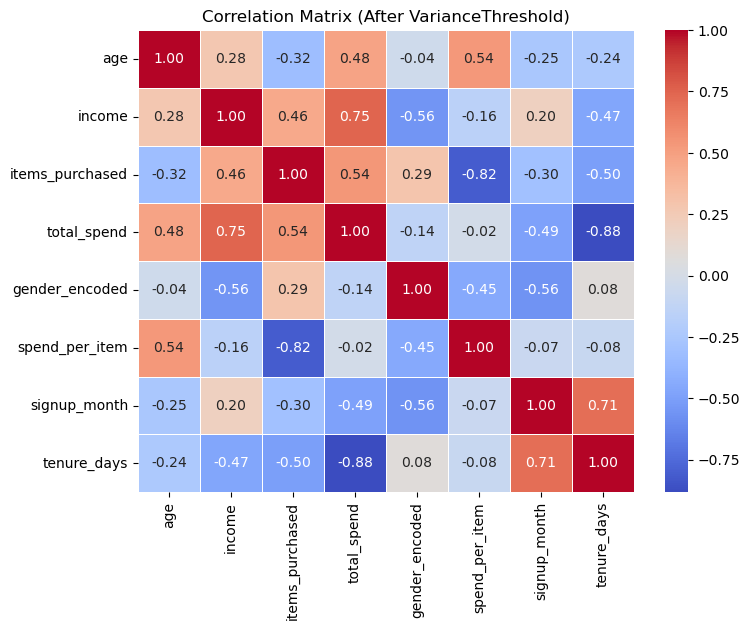

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold
import numpy as np

# Step 1: Select numeric columns
df_numeric = df.select_dtypes(include=[np.number])

# Step 2: Apply VarianceThreshold
selector = VarianceThreshold(threshold=0.1)
df_var_filtered = selector.fit_transform(df_numeric)

# Step 3: Get remaining column names
selected_columns = df_numeric.columns[selector.get_support()]
df_filtered = df_numeric[selected_columns]

# Step 4: Correlation matrix for filtered features
corr_matrix_filtered = df_filtered.corr()

# Step 5: Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix_filtered, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix (After VarianceThreshold)")
plt.show()


- Correlation-based (manual)

In [12]:
# Drop features with high correlation (> 0.9)
corr_matrix = df_numeric.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [col for col in upper.columns if any(upper[col] > 0.9)]
df.drop(columns=to_drop, inplace=True)

df

,gender,region,age,income,items_purchased,total_spend,gender_encoded,spend_per_item,signup_month,signup_weekday,tenure_days
0,Male,West,25,45000,5,200.0,1,40.0,1,Tuesday,905
1,Female,East,34,52000,3,180.0,0,60.0,11,Saturday,971
2,Female,West,39,61000,6,300.0,0,50.0,3,Wednesday,841
3,Female,North,45,49000,2,230.0,0,115.0,2,Wednesday,883
4,Male,East,52,51000,4,250.0,1,62.5,1,Tuesday,905


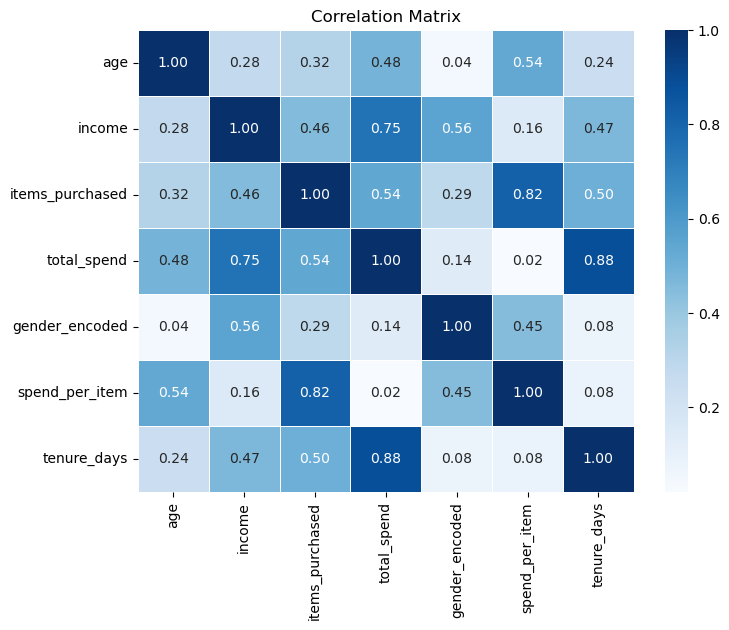

Dropping highly correlated columns: []


In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Select only numeric columns
df_numeric = df.select_dtypes(include=[np.number])

df_numeric = df_numeric.drop(columns=['signup_month'], errors='ignore')

# Step 2: Compute correlation matrix
corr_matrix = df_numeric.corr().abs()

# Step 3: Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

# Step 4: Identify and drop highly correlated features
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [col for col in upper.columns if any(upper[col] > 0.9)]

print("Dropping highly correlated columns:", to_drop)

# Drop them from the original df
df.drop(columns=to_drop, inplace=True)


In [14]:
df.rename(columns={"total_spend": "sales"}, inplace=True)

## 3. Advanced Pandas Techniques

In [34]:
data = {
    'customer_id': range(1, 11),
    'customer_segment': ['Retail', 'Corporate', 'Home Office', 'Retail', 'Corporate',
                         'Retail', 'Home Office', 'Corporate', 'Retail', 'Corporate'],
    'region': ['North', 'South', 'East', 'West', 'North', 'East', 'South', 'North', 'West', 'South'],
    'product': ['A', 'B', 'C', 'A', 'C', 'B', 'A', 'C', 'B', 'A'],
    'sales': [1200, 850, 560, 1430, 760, 980, 3050, 1300, 210, 1670],
    'revenue': [1500, 1000, 700, 1600, 900, 1150, 3200, 1400, 300, 1800],
    'cost': [1000, 700, 400, 1100, 600, 800, 2800, 1100, 250, 1300],
    'total_spent': [5000, 3400, 2000, 6000, 2500, 4000, 8000, 5500, 1300, 6700],
    'signup_month': [1, 3, 2, 1, 4, 3, 2, 1, 4, 3]
}

# Create DataFrame
df = pd.DataFrame(data)
df

,customer_id,customer_segment,region,product,sales,revenue,cost,total_spent,signup_month
0,1,Retail,North,A,1200,1500,1000,5000,1
1,2,Corporate,South,B,850,1000,700,3400,3
2,3,Home Office,East,C,560,700,400,2000,2
3,4,Retail,West,A,1430,1600,1100,6000,1
4,5,Corporate,North,C,760,900,600,2500,4
5,6,Retail,East,B,980,1150,800,4000,3
6,7,Home Office,South,A,3050,3200,2800,8000,2
7,8,Corporate,North,C,1300,1400,1100,5500,1
8,9,Retail,West,B,210,300,250,1300,4
9,10,Corporate,South,A,1670,1800,1300,6700,3


In [29]:
# Example: Average spend by customer segment
summary = df.groupby('customer_segment')['total_spent'].agg(['mean', 'max', 'min', 'count'])
print(summary)

                    mean   max   min  count
customer_segment                           
Corporate         4525.0  6700  2500      4
Home Office       5000.0  8000  2000      2
Retail            4075.0  6000  1300      4


In [30]:
# Example: Average sales by region and product
pivot = df.pivot_table(values='sales', index='region', columns='product', aggfunc='mean', fill_value=0)
print(pivot)

product       A      B       C
region                        
East        0.0  980.0   560.0
North    1200.0    0.0  1030.0
South    2360.0  850.0     0.0
West     1430.0  210.0     0.0


In [36]:
# Example: Filter rows where sales > 1000 and region is 'North'
filtered = df.query("sales > 1000 and region == 'North'")
display(filtered.head())

,customer_id,customer_segment,region,product,sales,revenue,cost,total_spent,signup_month
0,1,Retail,North,A,1200,1500,1000,5000,1
7,8,Corporate,North,C,1300,1400,1100,5500,1


In [32]:
# Example: Flag high-value customers
df['is_high_value'] = df['total_spent'].apply(lambda x: 'Yes' if x > 5000 else 'No')
df.head()

,customer_id,customer_segment,region,product,sales,revenue,cost,total_spent,signup_month,is_high_value
0,1,Retail,North,A,1200,1500,1000,5000,1,No
1,2,Corporate,South,B,850,1000,700,3400,3,No
2,3,Home Office,East,C,560,700,400,2000,2,No
3,4,Retail,West,A,1430,1600,1100,6000,1,Yes
4,5,Corporate,North,C,760,900,600,2500,4,No


In [33]:
# Row-wise logic (axis=1)
df['net_profit'] = df.apply(lambda row: row['revenue'] - row['cost'], axis=1)
df.head()

,customer_id,customer_segment,region,product,sales,revenue,cost,total_spent,signup_month,is_high_value,net_profit
0,1,Retail,North,A,1200,1500,1000,5000,1,No,500
1,2,Corporate,South,B,850,1000,700,3400,3,No,300
2,3,Home Office,East,C,560,700,400,2000,2,No,300
3,4,Retail,West,A,1430,1600,1100,6000,1,Yes,500
4,5,Corporate,North,C,760,900,600,2500,4,No,300


In [37]:
df = df.drop_duplicates()

In [38]:
df

,customer_id,customer_segment,region,product,sales,revenue,cost,total_spent,signup_month
0,1,Retail,North,A,1200,1500,1000,5000,1
1,2,Corporate,South,B,850,1000,700,3400,3
2,3,Home Office,East,C,560,700,400,2000,2
3,4,Retail,West,A,1430,1600,1100,6000,1
4,5,Corporate,North,C,760,900,600,2500,4
5,6,Retail,East,B,980,1150,800,4000,3
6,7,Home Office,South,A,3050,3200,2800,8000,2
7,8,Corporate,North,C,1300,1400,1100,5500,1
8,9,Retail,West,B,210,300,250,1300,4
9,10,Corporate,South,A,1670,1800,1300,6700,3


In [40]:
df['customer_segment'] = df['customer_segment'].str.lower().str.strip()

In [41]:
df

,customer_id,customer_segment,region,product,sales,revenue,cost,total_spent,signup_month
0,1,retail,North,A,1200,1500,1000,5000,1
1,2,corporate,South,B,850,1000,700,3400,3
2,3,home office,East,C,560,700,400,2000,2
3,4,retail,West,A,1430,1600,1100,6000,1
4,5,corporate,North,C,760,900,600,2500,4
5,6,retail,East,B,980,1150,800,4000,3
6,7,home office,South,A,3050,3200,2800,8000,2
7,8,corporate,North,C,1300,1400,1100,5500,1
8,9,retail,West,B,210,300,250,1300,4
9,10,corporate,South,A,1670,1800,1300,6700,3


In [42]:
# Remove outliers using z-score
from scipy.stats import zscore
df = df[(np.abs(zscore(df['sales'])) < 3)]

In [43]:
df

,customer_id,customer_segment,region,product,sales,revenue,cost,total_spent,signup_month
0,1,retail,North,A,1200,1500,1000,5000,1
1,2,corporate,South,B,850,1000,700,3400,3
2,3,home office,East,C,560,700,400,2000,2
3,4,retail,West,A,1430,1600,1100,6000,1
4,5,corporate,North,C,760,900,600,2500,4
5,6,retail,East,B,980,1150,800,4000,3
6,7,home office,South,A,3050,3200,2800,8000,2
7,8,corporate,North,C,1300,1400,1100,5500,1
8,9,retail,West,B,210,300,250,1300,4
9,10,corporate,South,A,1670,1800,1300,6700,3


## 4: Visual Example – Joining Data

In [5]:
# Create customer and order tables
customers = pd.DataFrame({
    'customer_id': [1, 2],
    'customer_segment': ['Retail', 'Corporate']
})

orders = pd.DataFrame({
    'order_id': [101, 102],
    'customer_id': [1, 1],
    'sales': [250, 120]
})

# Join the two
merged_df = pd.merge(orders, customers, on='customer_id', how='left')
display(merged_df)

,order_id,customer_id,sales,customer_segment
0,101,1,250,Retail
1,102,1,120,Retail


In [6]:
display(customers)

,customer_id,customer_segment
0,1,Retail
1,2,Corporate


In [7]:
display(orders)

,order_id,customer_id,sales
0,101,1,250
1,102,1,120


C:\Users\riyab\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128556 (\N{GRIMACING FACE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


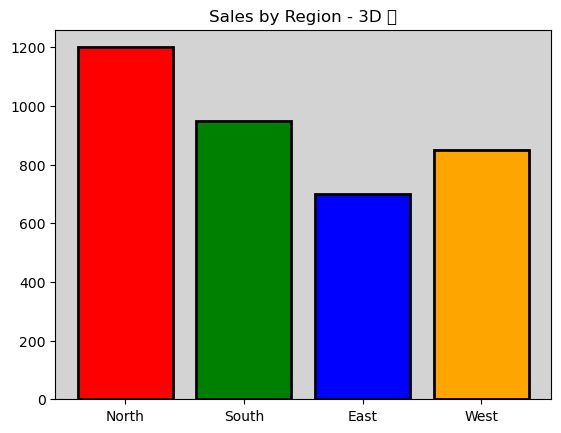

In [8]:
import matplotlib.pyplot as plt

regions = ['North', 'South', 'East', 'West']
sales = [1200, 950, 700, 850]

fig, ax = plt.subplots()
bars = ax.bar(regions, sales, color=['red', 'green', 'blue', 'orange'])

# Simulate chartjunk with fake 3D effect
for bar in bars:
    bar.set_edgecolor('black')
    bar.set_linewidth(2)

ax.set_facecolor('lightgrey')
plt.title("Sales by Region - 3D 😬")
plt.show()


C:\Users\riyab\anaconda3\lib\site-packages\seaborn\_core.py:1485: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


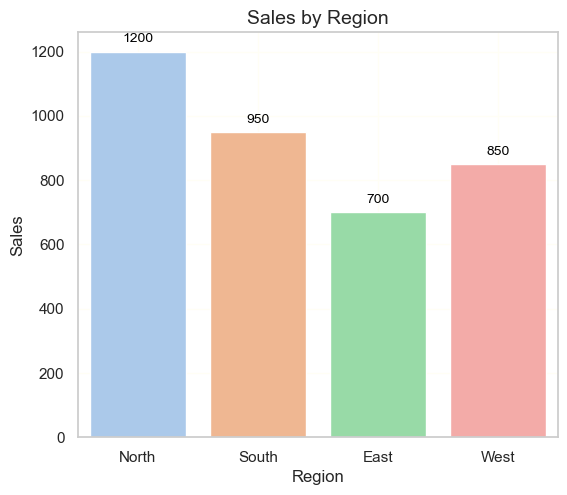

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data
regions = ['North', 'South', 'East', 'West']
sales = [1200, 950, 700, 850]

# Set style
sns.set(style='whitegrid')

# Create plot
fig, ax = plt.subplots(figsize=(6, 3))

# Plot bar chart
sns.barplot(x=regions, y=sales, palette='pastel', ax=ax)

# Light cream gridlines
ax.grid(color='#fffef5')

# Add labels
for bar in ax.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height + 20,
        f'{int(height)}',
        ha='center',
        va='bottom',
        fontsize=10,
        color='black'
    )

# Set title and labels
ax.set_title("Sales by Region", fontsize=14)
ax.set_xlabel("Region")
ax.set_ylabel("Sales")

# ✅ Add inner padding (left, right, bottom, top)
plt.subplots_adjust(left=0.15, right=0.95, bottom=0.15, top=1.5)

plt.show()


## Matplotlib

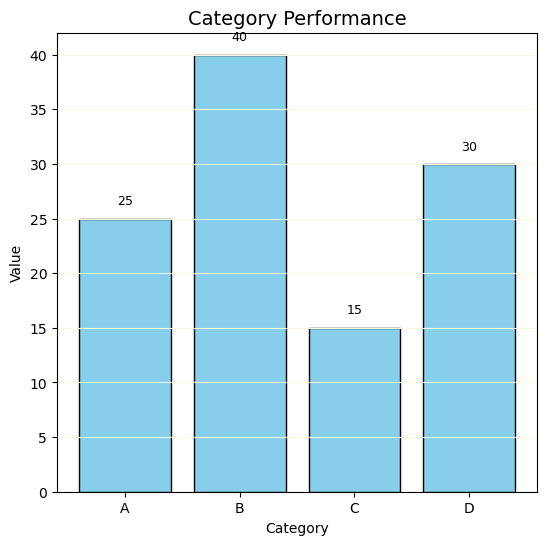

In [11]:
import matplotlib.pyplot as plt

# Data
categories = ['A', 'B', 'C', 'D']
values = [25, 40, 15, 30]

# Create figure and axis
fig, ax = plt.subplots(figsize=(6, 3))

# Bar plot
bars = ax.bar(categories, values, color='skyblue', edgecolor='black')

# Titles and labels
ax.set_title("Category Performance", fontsize=14)
ax.set_xlabel("Category")
ax.set_ylabel("Value")

# Light gridlines
ax.grid(True, axis='y', color='#fdf6e3')

# Add value labels above bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 1, f'{height}',
            ha='center', va='bottom', fontsize=9)

# ✅ Adjust inner padding
plt.subplots_adjust(left=0.15, right=0.95, top=1.58, bottom=0.05)

# Show plot
plt.show()


## Seaborn

C:\Users\riyab\AppData\Local\Temp\ipykernel_9696\4160002712.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='day', y='total_bill', data=tips, palette='pastel')


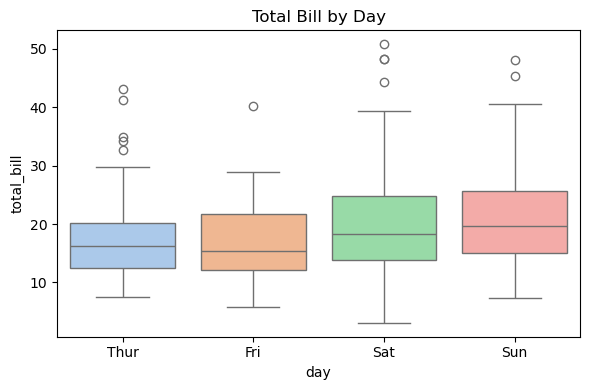

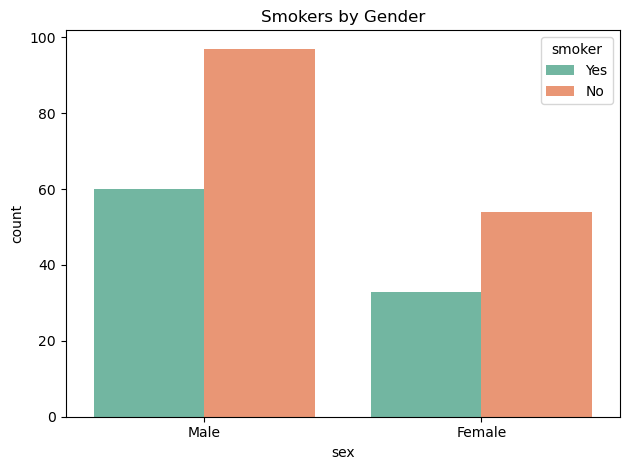

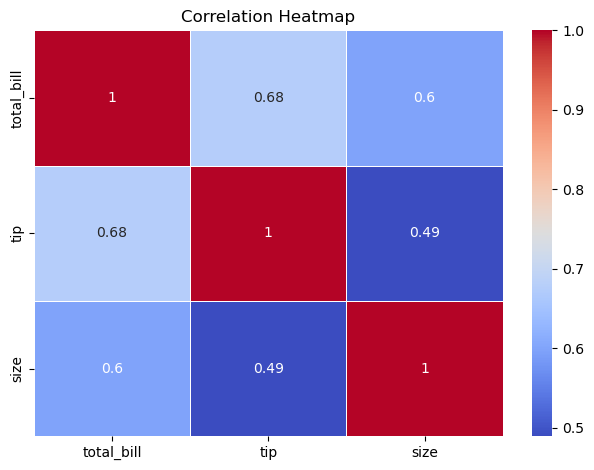

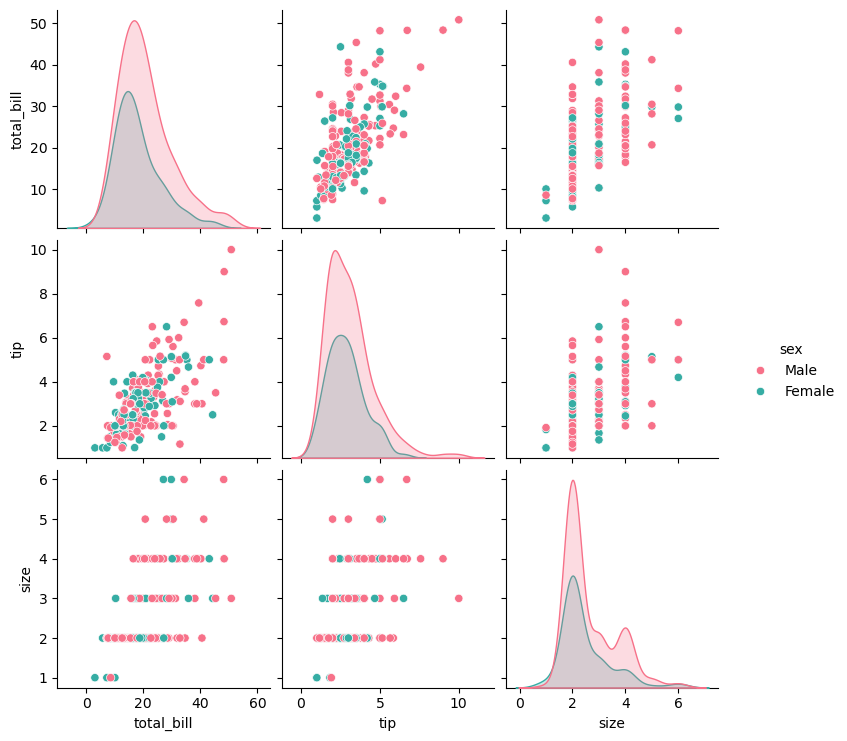

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example dataset
tips = sns.load_dataset("tips")

# 1. Boxplot: distribution across categories
plt.figure(figsize=(6, 4))
sns.boxplot(x='day', y='total_bill', data=tips, palette='pastel')
plt.title("Total Bill by Day")
plt.tight_layout()
plt.show()

# 2. Countplot: frequency of categories
sns.countplot(x='sex', hue='smoker', data=tips, palette='Set2')
plt.title("Smokers by Gender")
plt.tight_layout()
plt.show()

# 3. Heatmap: correlation matrix
corr = tips.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

# 4. Pairplot: scatter matrix
sns.pairplot(tips, hue='sex', palette='husl')

In [4]:
tips.head(10)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example dataset
tips = sns.load_dataset("tips")
display(tips.tail(10))

,total_bill,tip,sex,smoker,day,time,size
234,15.53,3.00,Male,Yes,Sat,Dinner,2
235,10.07,1.25,Male,No,Sat,Dinner,2
236,12.60,1.00,Male,Yes,Sat,Dinner,2
237,32.83,1.17,Male,Yes,Sat,Dinner,2
238,35.83,4.67,Female,No,Sat,Dinner,3
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


## Population Pyramid chart

C:\Users\riyab\AppData\Local\Temp\ipykernel_9696\340249185.py:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([abs(int(x)) for x in xticks])


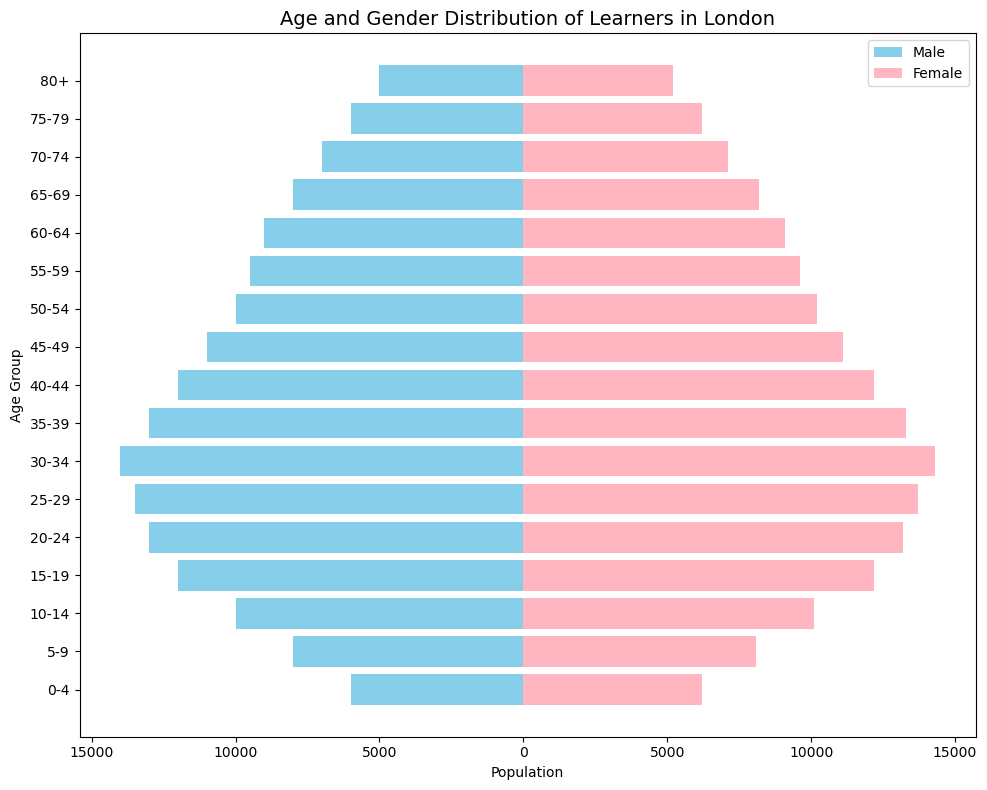

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data: Age groups and male/female population
age_groups = ['80+', '75-79', '70-74', '65-69', '60-64', '55-59', '50-54',
              '45-49', '40-44', '35-39', '30-34', '25-29', '20-24', '15-19',
              '10-14', '5-9', '0-4']

# Note: Male values are negative for the mirrored effect
male = [-5000, -6000, -7000, -8000, -9000, -9500, -10000, -11000, -12000,
        -13000, -14000, -13500, -13000, -12000, -10000, -8000, -6000]

female = [5200, 6200, 7100, 8200, 9100, 9600, 10200, 11100, 12200,
          13300, 14300, 13700, 13200, 12200, 10100, 8100, 6200]

# Create DataFrame
df = pd.DataFrame({
    'Age Group': age_groups,
    'Male': male,
    'Female': female
})

# Plotting
fig, ax = plt.subplots(figsize=(10, 8))

# Horizontal bar chart
ax.barh(df['Age Group'], df['Male'], color='skyblue', label='Male')
ax.barh(df['Age Group'], df['Female'], color='lightpink', label='Female')

# Labels and formatting
ax.set_title('Age and Gender Distribution of Learners in London', fontsize=14)
ax.set_xlabel('Population')
ax.set_ylabel('Age Group')
ax.legend(loc='upper right')

# Make x-axis labels absolute values
xticks = ax.get_xticks()
ax.set_xticklabels([abs(int(x)) for x in xticks])

# Clean layout
plt.tight_layout()
plt.gca().invert_yaxis()  # So the oldest age group is at the top
plt.show()
